# Proyecto Series de Tiempo: Sectores productores con mayor desarrollo del Estado de Jalisco (ODS8) $\bigstar$

Brenda Itzelt Gómez Catzín | itzeltgomezc@hotmail.com

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

## Limpieza de datos PIB

In [2]:
data = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\TEC\UNII\SEXTO_SEMESTRE\analisis_numerico\modulos\m1\Proyecto_SeriesTiempo\data\PIB\conjunto_de_datos\conjunto_de_datos_pibe_entidad_jal2023_p.csv").T

In [3]:
data.columns = data.iloc[0] 
data = data.iloc[1:]

In [4]:
data = data.iloc[:-1]

In [5]:
data

Descriptores,Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>,"Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias<C1>,...,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
2003,1212171.197,89083.785,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,364721.019,...,NaN,NaN,NaN,N

In [6]:
data.reset_index(inplace = True)

In [7]:
data

Descriptores,index,Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>,"Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",...,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003,1212171.197,89083.785,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1246901.39,91195.52,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,..

In [8]:
data.rename(columns = {'index': 'Año'}, inplace= True) 

In [9]:
data

Descriptores,Año,Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>,"Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",...,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Variación porcentual anual de los índices de precios implícitos|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003,1212171.197,89083.785,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,1246901.39,91195.52,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,...,

* en este caso, solo nos importan las variables que son por sector pero que están expresadas en millones de pesos ya que nos dice cuánto aporta económicamente un sector en terminos reales (ya fue ajustado por inflación). En general, sirve para comparar el peso relativo de sectores o la evolución en el tiempo.

In [10]:
filtro = 'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total'
columnas_filtradas = [col for col in data.columns if filtro in col]

# agregamos el año
columnas_filtradas = ['Año'] + columnas_filtradas if 'Año' in data.columns else columnas_filtradas

data_filtrada = data[columnas_filtradas]

In [11]:
data_filtrada

Descriptores,Año,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total <C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias|21---Minería<C1>,...,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,364721.019,3508.826,...,108904.256,22479.676,272.029,40682.394,48688.906,27653.459,7864.724,35605.003,33269.574,34479.206
1,2004,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,367068.327,3169.513,...,112442.711,21335.434,265.433,43081.389,49540.2,27666.634,8016.458,33998.244,34562.803,34325.8
2,2005,1179123.909,68550.428,68550.

In [12]:
data.columns 

Index(['Año',
       'Millones de pesos a precios de 2018|B.1bP---Producto interno bruto<C1>',
       'Millones de pesos a precios de 2018|D.21-D.31---Impuestos sobre los productos, netos',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  <C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>',
       'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primari

In [13]:
data_filtrada.rename(columns = {
    'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  <C1>': 'Valor_agregado_bruto_total',
    'Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades primarias<C1>': 'actividades_agropecuarias',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades secundarias|31-33---Industrias manufactureras|312---Industria de las bebidas y del tabaco<C1>": 'bebidas_tabaco',
    "Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total  |Actividades secundarias|31-33---Industrias manufactureras|333-336---Fabricación de maquinaria y equipo; Fabricación de equipo de computación, comunicación, medición y de otros equipos, componentes y accesorios electrónicos; Fabricación de accesorios, aparatos eléctricos y equipo de generación de energía eléctrica; Fabricación de equipo de transporte<C1>": "maquinaria",
}, inplace = True)


C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19884\2127714634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada.rename(columns = {


In [14]:
data_filtrada["Año"] = pd.to_datetime(data_filtrada["Año"], format = '%Y')

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19884\3440771889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada["Año"] = pd.to_datetime(data_filtrada["Año"], format = '%Y')


In [15]:
data_filtrada

Descriptores,Año,Valor_agregado_bruto_total,actividades_agropecuarias,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|111---Agricultura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|112---Cría y explotación de animales<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|114---Pesca, caza y captura<C1>","Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades primarias|11---Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza|113,115---Aprovechamiento forestal, Servicios relacionados con las actividades agropecuarias y forestales<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades secundarias|21---Minería<C1>,...,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|53---Servicios inmobiliarios y de alquiler de bienes muebles e intangibles<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|54---Servicios profesionales, científicos y técnicos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|55---Corporativos<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|56---Servicios de apoyo a los negocios y manejo de residuos, y servicios de remediación<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|61---Servicios educativos<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|62---Servicios de salud y de asistencia social<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|71---Servicios de esparcimiento culturales y deportivos, y otros servicios recreativos<C1>",Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|72---Servicios de alojamiento temporal y de preparación de alimentos y bebidas<C1>,Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|81---Otros servicios excepto actividades gubernamentales<C1>,"Millones de pesos a precios de 2018|B.1bV---Valor agregado bruto|Actividad económica total |Actividades terciarias|93---Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales<C1>"
0,2003-01-01,1123087.412,63782.62,63782.62,29360.455,32261.345,80.028,2080.792,364721.019,3508.826,...,108904.256,22479.676,272.029,40682.394,48688.906,27653.459,7864.724,35605.003,33269.574,34479.206
1,2004-01-01,1155705.87,71754.361,71754.361,36003.578,33320.35,108.389,2322.044,367068.327,3169.513,...,112442.711,21335.434,265.433,43081.389,49540.2,27666.634,8016.458,33998.244,34562.803,34325.8
2,2005-01-01,1179123.909,68550.428,68550.428,34030.475,33405.606,83.12,1031.227,379801.885,3432.646,...,115139.251,22461.864,253.845,44129.555,49602.535,26554.463,8052.09,36601.092,354

In [16]:
cols_numeric = ['Valor_agregado_bruto_total', 'actividades_agropecuarias', 'bebidas_tabaco', 'maquinaria']

for c in cols_numeric:
    data_filtrada[c] = pd.to_numeric(data_filtrada[c], errors='coerce')

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19884\1402373228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada[c] = pd.to_numeric(data_filtrada[c], errors='coerce')


In [17]:
cols = ['Año'] + cols_numeric
df_mm = data_filtrada[cols].copy()
df_mm

Descriptores,Año,Valor_agregado_bruto_total,actividades_agropecuarias,bebidas_tabaco,maquinaria
0,2003-01-01,1123087.412,63782.620,20709.818,89707.795
1,2004-01-01,1155705.870,71754.361,22640.442,76505.138
2,2005-01-01,1179123.909,68550.428,25123.721,80337.049
3,2006-01-01,1239683.419,73155.353,26098.118,92392.023
4,2007-01-01,1280271.291,79127.643,26596.654,93513.649
5,2008-01-01,1300984.651,80914.860,30312.726,80141.018
6,2009-01-01,1220828.370,70072.893,29738.597,76156.633
7,2010-01-01,1298494.412,77001.696,30470.787,83749.991
8,2011-01-01,1341965.239,76909.094,28589.499,79037.002
9,2012-01-01,1393050.660,84848.153,31778.016,88189.125


In [18]:
df_mm

Descriptores,Año,Valor_agregado_bruto_total,actividades_agropecuarias,bebidas_tabaco,maquinaria
0,2003-01-01,1123087.412,63782.620,20709.818,89707.795
1,2004-01-01,1155705.870,71754.361,22640.442,76505.138
2,2005-01-01,1179123.909,68550.428,25123.721,80337.049
3,2006-01-01,1239683.419,73155.353,26098.118,92392.023
4,2007-01-01,1280271.291,79127.643,26596.654,93513.649
5,2008-01-01,1300984.651,80914.860,30312.726,80141.018
6,2009-01-01,1220828.370,70072.893,29738.597,76156.633
7,2010-01-01,1298494.412,77001.696,30470.787,83749.991
8,2011-01-01,1341965.239,76909.094,28589.499,79037.002
9,2012-01-01,1393050.660,84848.153,31778.016,88189.125


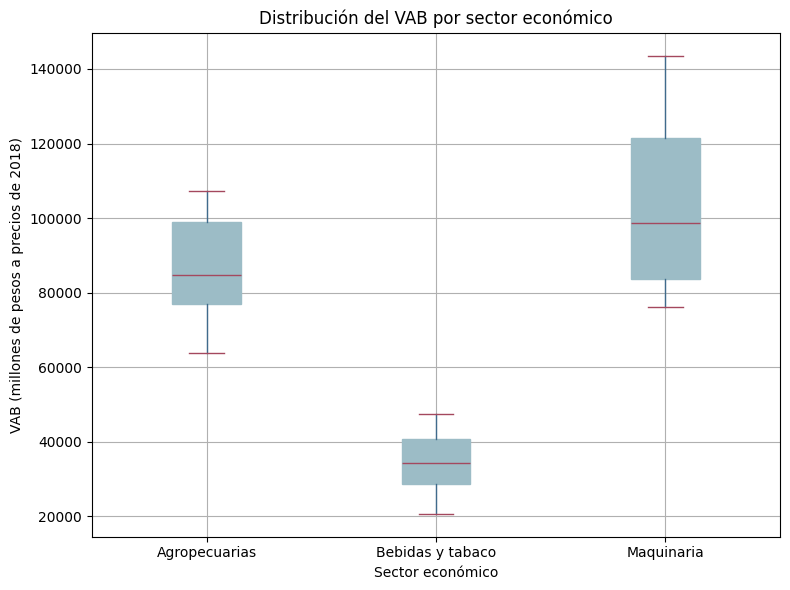

In [19]:
df_mm[['actividades_agropecuarias', 'bebidas_tabaco', 'maquinaria']].plot(
    kind='box',
    figsize=(8, 6),
    grid=True,
    patch_artist=True,  
    boxprops=dict(facecolor='#9cbcc6', color='#9cbcc6'),
    whiskerprops=dict(color='#406b8c'),
    capprops=dict(color='#a4485e'),
    medianprops=dict(color='#a4485e'),
    flierprops=dict(markerfacecolor='#cc7229', marker='o', markersize=5, linestyle='none')
)

plt.title('Distribución del VAB por sector económico')
plt.ylabel('VAB (millones de pesos a precios de 2018)')
plt.xlabel('Sector económico')
plt.xticks([1, 2, 3], ['Agropecuarias', 'Bebidas y tabaco', 'Maquinaria'])
plt.tight_layout()
plt.savefig("boxplot_sectores.jpg")
plt.show()

## Serie de tiempo 

* Visualizaciones iniciales

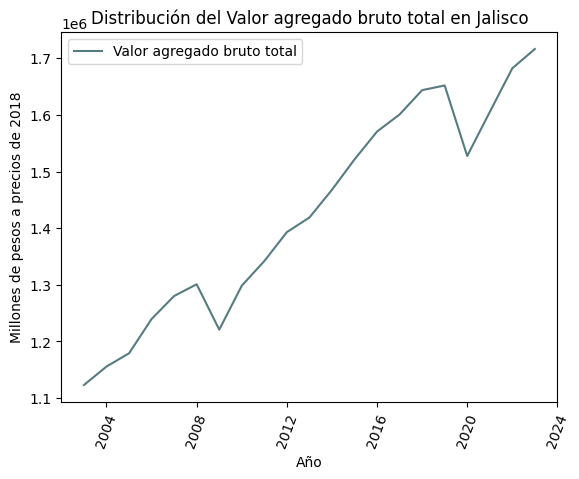

In [20]:
# analizamos la serie (linplot de los años)
sns.lineplot(data = df_mm, x = "Año", y = "Valor_agregado_bruto_total", color = "#567b81", label = "Valor agregado bruto total")
plt.xlabel("Año")
plt.ylabel("Millones de pesos a precios de 2018")
plt.title("Distribución del Valor agregado bruto total en Jalisco")
plt.xticks(rotation = 70)
plt.savefig('Distribución del Valor agregado bruto total en Jalisco')
plt.show();

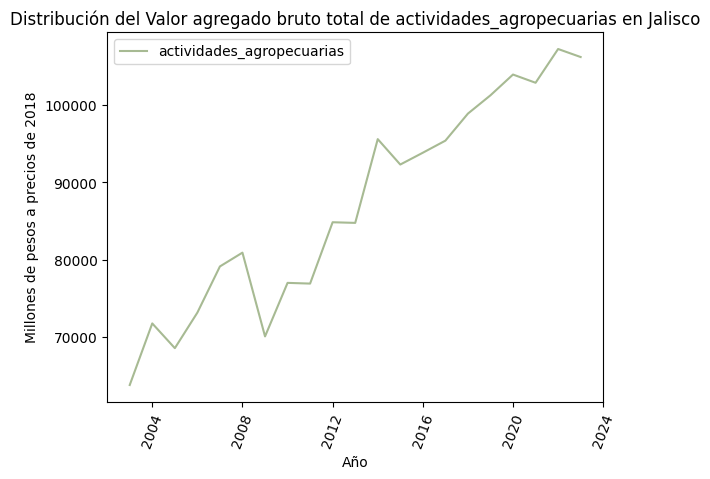

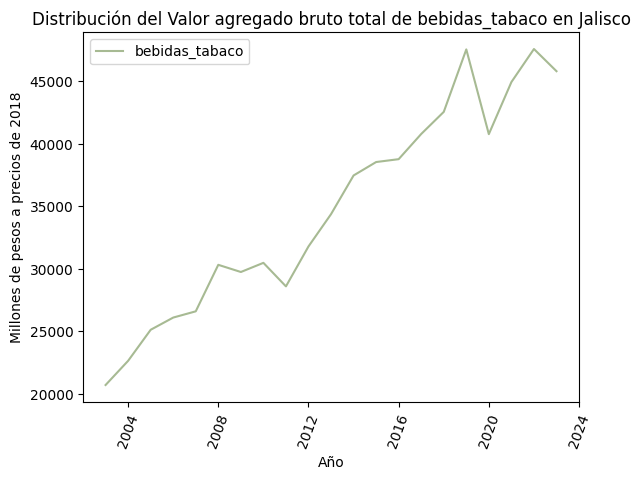

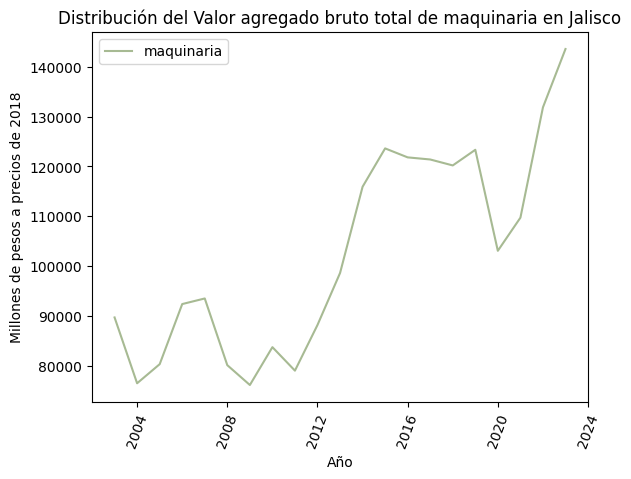

In [21]:
sector = ["actividades_agropecuarias", "bebidas_tabaco", 'maquinaria']

for sec in sector:
    sns.lineplot(data = df_mm, x = "Año", y = sec, color = "#a7ba93", label = sec)
    plt.xlabel("Año")
    plt.ylabel("Millones de pesos a precios de 2018")
    plt.title(f"Distribución del Valor agregado bruto total de {sec} en Jalisco")
    plt.xticks(rotation = 70)
    plt.savefig(f"Distribución del Valor agregado bruto total de {sec} en Jalisco.png")
    plt.show();

* En la primer distribución, podemos ver dos cambios súbitos: 2008 y 2020, los cuales corresponden a los años de la crisis económica de la vivienda y el covid-19. Por otro lado, cuando hacemos la distribución por sectores, podemos ver cierta tendencia en todos nuestros sectores. Debemos de recordar que, si tenemos tendencia, por ende $\mu_t$ no es constante, lo cual contradice los supuestos de los procesos estacionarios. 

* Sin embargo, un gráfico no es suficiente para hacer conclusiones, por lo cual, debemos de aplicar pruebas estadísticas que nos ayude a la toma de decisiones. Para ello, aplicamos la prueba de Dickey-Fuller. 

### Agricultura

In [22]:
df_agropecuarios = df_mm[['Año', 'actividades_agropecuarias']].copy()
df_agropecuarios

Descriptores,Año,actividades_agropecuarias
0,2003-01-01,63782.620
1,2004-01-01,71754.361
2,2005-01-01,68550.428
3,2006-01-01,73155.353
4,2007-01-01,79127.643
5,2008-01-01,80914.860
6,2009-01-01,70072.893
7,2010-01-01,77001.696
8,2011-01-01,76909.094
9,2012-01-01,84848.153


In [23]:
df_agropecuarios.set_index("Año", inplace=True)
df_agropecuarios.index.freq = "AS-JAN"

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_19884\405701491.py:2: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_agropecuarios.index.freq = "AS-JAN"


In [24]:
from statsmodels.tsa.seasonal import STL

decomposition_agropecuarios = STL(df_agropecuarios['actividades_agropecuarias'], period = 4).fit()

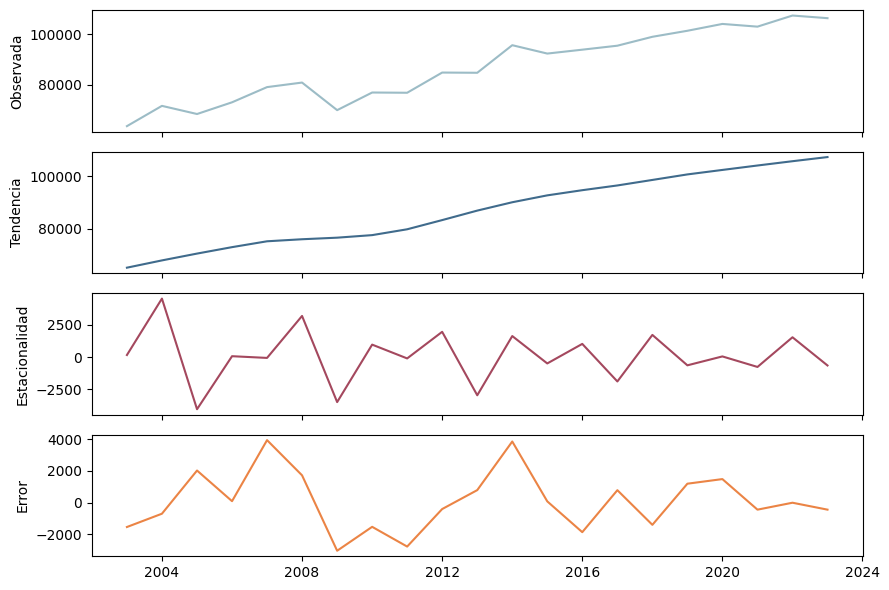

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, sharex = True)

fig.set_figwidth(9)
fig.set_figheight(6)
ax1.plot(decomposition_agropecuarios.observed, color = "#9CBCC6")
ax1.set_ylabel("Observada")
ax2.plot(decomposition_agropecuarios.trend, color = "#406B8C")
ax2.set_ylabel("Tendencia")
ax3.plot(decomposition_agropecuarios.seasonal, color = "#A4485E")
ax3.set_ylabel("Estacionalidad")
ax4.plot(decomposition_agropecuarios.resid, color = "#EB8445")
ax4.set_ylabel("Error")
plt.tight_layout()
plt.savefig("Estructura de la serie de tiempo de los sectores agropecuarios.jpg")
plt.show();

Podemos observar cierta tendencia, pero apliquemos la prueba de ADF

In [26]:
test_estacionalidad_agropecuarias = adfuller(df_mm["actividades_agropecuarias"].copy().astype(float).dropna())
print(f"Estadístico de prueba: {test_estacionalidad_agropecuarias[0]}")
print(f"Valor p: {test_estacionalidad_agropecuarias[1]}")

Estadístico de prueba: -0.6081063782398816
Valor p: 0.8691397765613852


¿cómo interpretamos esto?

* $H_{0}: \text{Existe raíz unitaria}$
* $H_{\alpha}: \text{No existe una raíz unitaria}$

buscamos rechazar nuestra hipótesis nula, ya que si no existen raíces unitarias entonces la series de tiempo es estacionaria


obtuvimos un p-value muy grande, por lo cual, no podemos rechazar nuestra hipótesis nula y tenemos que diferenciar nuestra serie 

In [27]:
agropecuarias_1 = np.diff(df_mm["actividades_agropecuarias"].copy(), n = 1)

In [28]:
test_estacionalidad_agropecuarias_1 = adfuller(agropecuarias_1)
print(f"Estadístico de prueba: {test_estacionalidad_agropecuarias_1[0]}")
print(f"Valor p: {test_estacionalidad_agropecuarias_1[1]}")

Estadístico de prueba: -1.1578771961671026
Valor p: 0.6914485073039773


el p-value sigue siendo grande, volvemos a diferenciar

In [29]:
agropecuarias_2 = np.diff(agropecuarias_1, n = 1)

test_estacionalidad_agropecuarias_2 = adfuller(agropecuarias_2)
print(f"Estadístico de prueba: {test_estacionalidad_agropecuarias_2[0]}")
print(f"Valor p: {test_estacionalidad_agropecuarias_2[1]}")

Estadístico de prueba: -10.114299280074503
Valor p: 9.816381683343694e-18


obtuvimo un p-value menor a 0.05, rechazamos la hipotesis nula y tenemos una serie estacionara con un 95% de confianza!

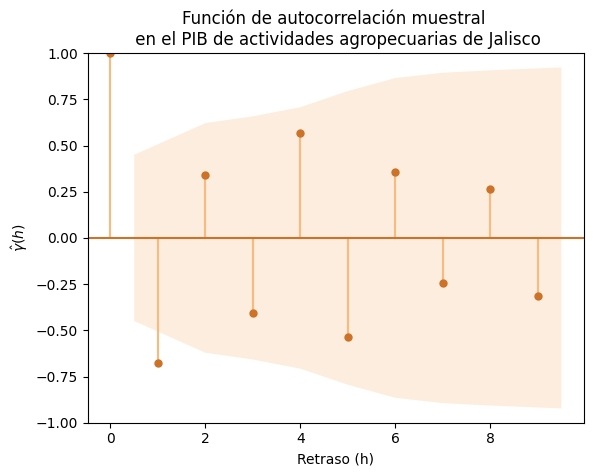

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(agropecuarias_2, vlines_kwargs = {"color": "#f9b97f"}, color = "#cc7229", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\gamma}(h)$")
plt.title("Función de autocorrelación muestral \n en el PIB de actividades agropecuarias de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#f9b97f")
plt.savefig("prueba acf agricultural.png")
plt.show();

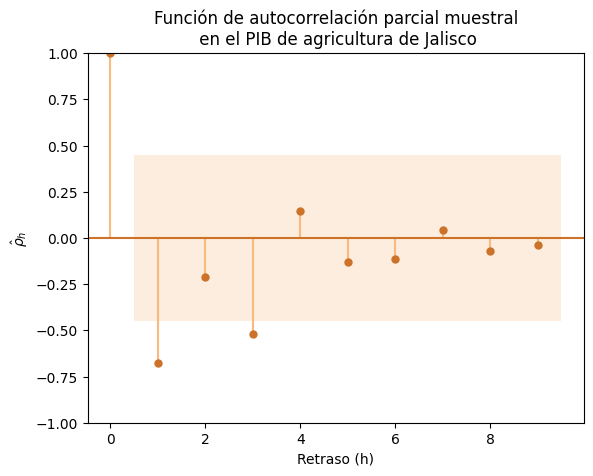

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(agropecuarias_2, vlines_kwargs = {"color": "#f9b97f"}, color = "#cc7229", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\rho}_{h}$")
plt.title("Función de autocorrelación parcial muestral\n en el PIB de agricultura de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#f9b97f")
plt.savefig("prueba pacf agricultural.png")    
plt.show();

Primero, observamos en la ACF que las autocorrelaciones caen gradualmente en comparación de la PACF, la cual muestra un claro corte en el rezago 1, entonces analicemos cómo se ve un AR(1)

In [32]:
train_agropecuarios = df_agropecuarios[:-3]
test_agropecuarios = df_agropecuarios[-3:]

In [33]:
def my_ar(data, train_len, test_len, step_ahead, p):
    '''Ajusta un modelo AR(p) de forma iterativa a un conjunto de datos y realiza un pronóstico un paso adelante para cada modelo.

    Parámetros
    ----------
    data: pd.DataFrame
             Serie de tiempo.
    train_len: int
             Tamaño del training set.
    test_len: int
             Tamaño del test set.
    step_ahead: int
             Número de pasos en el futuro para el pronóstico.
    p: int
             Orden del proceso AR.

    Output
    ------
    forecasts: np.array
              Arreglo con los pronósticos step_ahead pasos adelante.
    '''

    ## Calculamos el tamaño total de la serie de tiempo
    #lo primero que calculamos es el tamaño total de la serie de tiempo
    total_len = train_len + test_len

    ## Inicializamos un array para los pronósticos
    forecasts = np.array([])

    ## Usamos un ciclo for para realizar el ajuste de los modelos AR(p)
    #empezar ciclo for para ajustar modelos autorregresivos
    for i in range(train_len, total_len, step_ahead):
        model = SARIMAX(data.iloc[:i], order=(p, 0, 0)).fit()
        forecasts = np.append(forecasts, model.predict(i, i+ step_ahead -1))

    ## Regresamos los pronósticos
    return forecasts

In [34]:
train_len_agropecuarios = len(train_agropecuarios)
test_len_agropecuarios = len(test_agropecuarios)
step_ahead_agropecuaios = 3
p = 1

In [35]:
forecast_agropecuarios = my_ar(df_agropecuarios['actividades_agropecuarias'], train_len_agropecuarios, test_len_agropecuarios, step_ahead_agropecuaios, p)
forecast_agropecuarios

c:\Users\Coord-Personal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


array([103750.49066972, 103536.93980035, 103323.82848527])

In [36]:
mse_agropecuarios_ar = np.mean((test_agropecuarios['actividades_agropecuarias'] - forecast_agropecuarios)**2)
mse_agropecuarios_ar

7701564.50585295

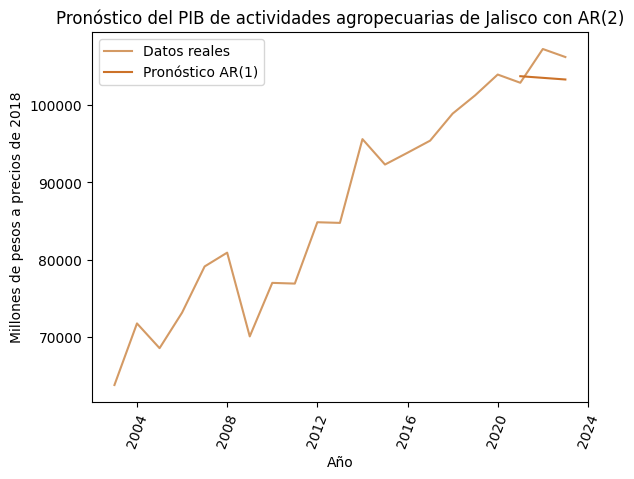

In [37]:
sns.lineplot(x=df_agropecuarios.index, y=df_agropecuarios['actividades_agropecuarias'], color="#D49A64", label="Datos reales")
sns.lineplot(x=test_agropecuarios.index, y=forecast_agropecuarios, color="#cc7229", label="Pronóstico AR(1)")
plt.xlabel("Año")
plt.ylabel("Millones de pesos a precios de 2018")
plt.title("Pronóstico del PIB de actividades agropecuarias de Jalisco con AR(2)")
plt.xticks(rotation = 70)
plt.legend()
plt.show();

probemos un arima, si tenemos mejores resultados 

In [38]:
def optimize_arima(data, p, d, q):
    '''Ajusta un modelo ARIMA(p, d, q) de forma iterativa a un conjunto de datos y devuelve el AIC de cada modelo.

    Parámetros
    ----------
    data: pd.DataFrame
             Serie de tiempo.
    p: int
             Orden del proceso AR en el modelo ARIMA.
    d: int
             Orden de la diferencia aplicada para asegurar estacionariedad.
    q: int
             Orden del proceso MA en el modelo ARIMA.
    
    Output
    ------
    results: pd.DataFrame
              Data frame con los valores de p, d, q y el AIC asociado
    '''

    ## Generamos una partición (mesh)
    ## de los valores p y q, la reorganizamos
    ## en forma matricial para que sea
    ## más sencillo utilizar los valores
    x, y = np.meshgrid(p, q)
    orders = np.c_[x.ravel(), y.ravel()]

    ## Generamos una lista vacía para guardar
    ## los resultados del AIC de los modelos
    results = []

    ## Corremos un ciclo for para probar
    ## todas las combinaciones de parámetros
    for i in range(len(orders)):
        order_tuple = (orders[i,0], d, orders[i,1])
        model = SARIMAX(data, order = order_tuple).fit(maxiter = 1000)
        aic = model.aic
        results.append((order_tuple, aic))

    ## Convertimos los resultados a data frame
    ## y los ordenamos de acuerdo a su AIC
    results = pd.DataFrame(results, columns = ["Order", "AIC"]).sort_values(by = "AIC")

    return results

In [39]:
import warnings
warnings.filterwarnings("ignore")
p = np.arange(0, 3)
d = 2
q = np.arange(0, 3)

res_agropecuarios = optimize_arima(train_agropecuarios['actividades_agropecuarias'], p, d, q)
res_agropecuarios

,Order,AIC
8,"(2, 2, 2)",337.371992
0,"(0, 2, 0)",337.616622
4,"(1, 2, 1)",337.956534
6,"(0, 2, 2)",337.993346
7,"(1, 2, 2)",338.036709
5,"(2, 2, 1)",338.931605
2,"(2, 2, 0)",339.248867
1,"(1, 2, 0)",345.125837
3,"(0, 2, 1)",345.914780


Según los resultados del AIC, podmos observar mejores resultados con el ARIMA(2,2,2), si observamos, en penultimo lugar está el modelo pasado, entonces podemos esperar mejores resultados de este modelo

In [40]:
modelo_agropecuarios = SARIMAX(train_agropecuarios['actividades_agropecuarias'], order = (2, 2, 2)).fit(maxiter = 1000)
modelo_agropecuarios.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     actividades_agropecuarias   No. Observations:                   18
Model:                      SARIMAX(2, 2, 2)   Log Likelihood                -163.686
Date:                       Mon, 09 Jun 2025   AIC                            337.372
Time:                               00:10:34   BIC                            341.235
Sample:                           01-01-2003   HQIC                           337.570
                                - 01-01-2020                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3377      0.180     -1.876      0.061      -0.691       0.015
ar.L2          0.4985      0.210      2.374      0.018       0.087       0.910
ma.L1       2.746e-11   1.02e-10      0.270      0.787   -1.72e-10    2.26e-10
ma.L2         -1.0000      0.482     -2.076      0.038      -1.944      -0.056
sigma2      4.094e+07   1.18e-08   3.48e+15      0.000    4.09e+07    4.09e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.38   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.01   Prob(JB):                         0.70
Heteroskedasticity (H):               0.10   Skew:                            -0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.79e+34. Standard errors may be unstable.
"""

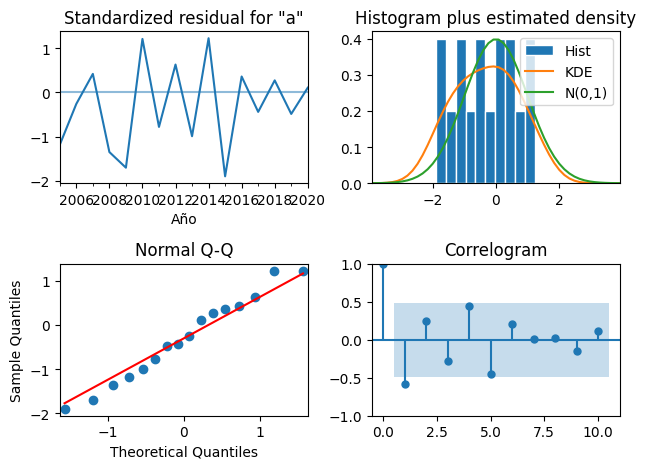

In [41]:
modelo_agropecuarios.plot_diagnostics()
plt.tight_layout()
plt.savefig("diagnosticos modelo agro.png")

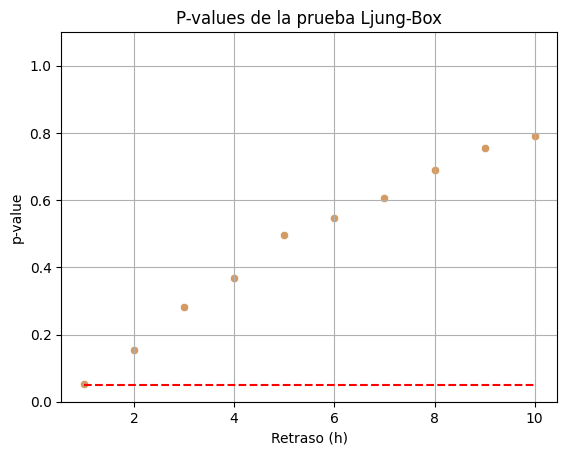

In [42]:
residuos_agropecuarios = modelo_agropecuarios.resid
ljbox_agro = acorr_ljungbox(residuos_agropecuarios, lags = 10)

sns.scatterplot(x = np.arange(1, 11, 1), y = ljbox_agro["lb_pvalue"], color = "#D49A64")
plt.hlines(y = 0.05, xmin = 1, xmax = 10, color = "red", linestyles = "--")
plt.grid()
plt.ylim(0, 1.1)
plt.xlabel("Retraso (h)")
plt.ylabel("p-value")
plt.title("P-values de la prueba Ljung-Box")
plt.savefig("prueba Ljung-Box modelo agro.png")
plt.show();

* evaluemos la precisión del modelo 

In [43]:
forecast_arima_agropecuarios = modelo_agropecuarios.forecast(steps = 3)
forecast_arima_agropecuarios

2021-01-01    109006.889268
2022-01-01    112773.582687
2023-01-01    118144.549441
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [46]:
mape_arima_agropecuarios = np.mean(np.abs((test_agropecuarios["actividades_agropecuarias"] - forecast_arima_agropecuarios) / test_agropecuarios["actividades_agropecuarias"])) * 100
print(f"MAPE del modelo ARIMA(2, 2, 2): {mape_arima_agropecuarios:.2f}%")

MAPE del modelo ARIMA(2, 2, 2): 7.43%


* realicemos las predicciones a tres años

In [47]:
# generamos el pronóstico
forecaste_arima_agropecuarios_futuro = modelo_agropecuarios.get_forecast(steps = 3)


# Extraer valores puntuales del pronóstico y su intervalo de confianza
forecast_mean_agro = forecaste_arima_agropecuarios_futuro.predicted_mean
conf_int_agro = forecaste_arima_agropecuarios_futuro.conf_int()

# creamos el índice de años
last_year = df_agropecuarios.index[-1]
future_dates = pd.date_range(start=last_year + pd.DateOffset(years=1), 
                               periods=3, freq='AS-JAN')

# 5. Poner el índice correcto en el forecast
forecast_mean_agro.index = future_dates
conf_int_agro.index = future_dates

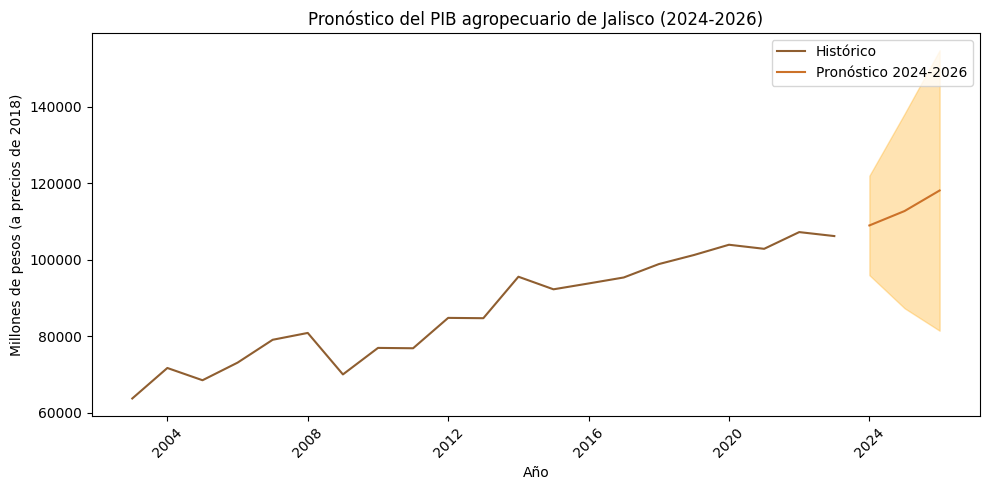

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agropecuarios, x=df_agropecuarios.index, y='actividades_agropecuarias', label='Histórico', color="#8f5e30")
sns.lineplot(x=forecast_mean_agro.index, y=forecast_mean_agro, label='Pronóstico 2024-2026', color="#cc7229")
plt.fill_between(forecast_mean_agro.index, conf_int_agro.iloc[:, 0], conf_int_agro.iloc[:, 1], color='orange', alpha=0.3)

plt.title('Pronóstico del PIB agropecuario de Jalisco (2024-2026)')
plt.xlabel('Año')
plt.ylabel('Millones de pesos (a precios de 2018)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("pronosticos agropecuarios.png")
plt.show()

### Industria bebidas

In [49]:
df_bebidas_tabaco = df_mm[["Año", "bebidas_tabaco"]].copy()

In [50]:
df_bebidas_tabaco.set_index("Año", inplace=True)
df_bebidas_tabaco.index.freq = "AS-JAN"

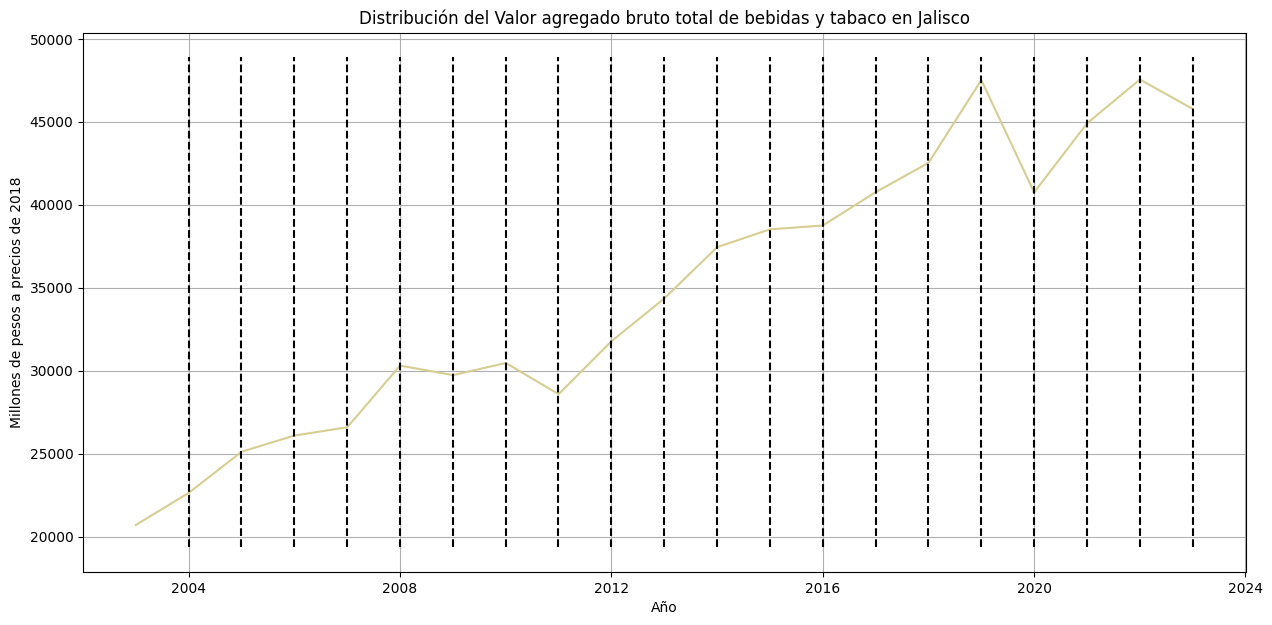

In [51]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
sns.lineplot(data = df_bebidas_tabaco, x = "Año", y = "bebidas_tabaco", color = "#d7ce93", ax = ax)
ymin, ymax = ax.get_ylim()
ax.vlines(x = pd.date_range("2003-01-01", "2023-01-01", freq = "YE"), ymin = ymin, ymax = ymax, linestyles = "--", color = "black")
ax.grid()
ax.set_xlabel("Año")
ax.set_ylabel("Millones de pesos a precios de 2018")
ax.set_title("Distribución del Valor agregado bruto total de bebidas y tabaco en Jalisco")
plt.show();

In [52]:
from statsmodels.tsa.seasonal import STL

decomposition_bebidas = STL(df_bebidas_tabaco['bebidas_tabaco'], period = 4).fit()

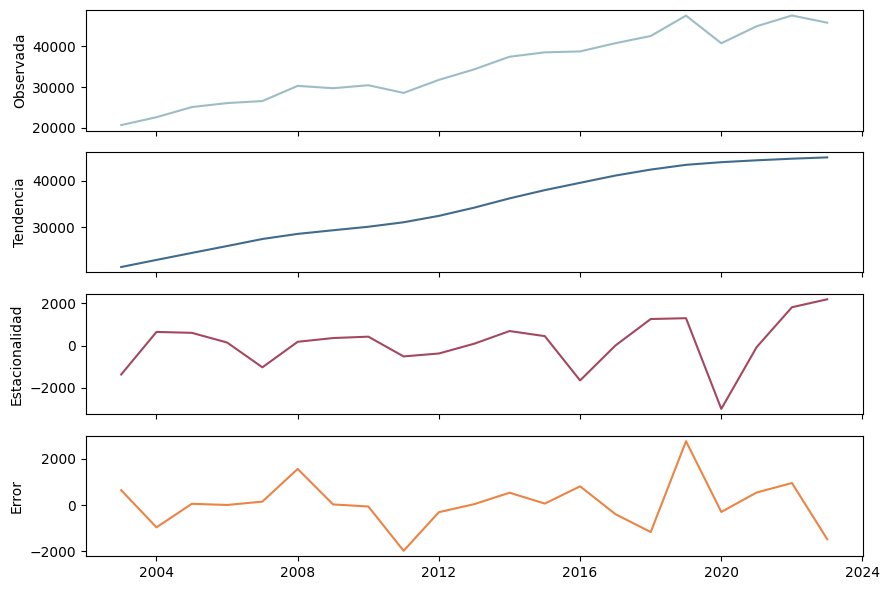

In [53]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, sharex = True)

fig.set_figwidth(9)
fig.set_figheight(6)
ax1.plot(decomposition_bebidas.observed, color = "#9CBCC6")
ax1.set_ylabel("Observada")
ax2.plot(decomposition_bebidas.trend, color = "#406B8C")
ax2.set_ylabel("Tendencia")
ax3.plot(decomposition_bebidas.seasonal, color = "#A4485E")
ax3.set_ylabel("Estacionalidad")
ax4.plot(decomposition_bebidas.resid, color = "#EB8445")
ax4.set_ylabel("Error")
plt.tight_layout()
plt.savefig("Estructura de la serie de tiempo de la industria de bebidas y tabaco.jpg")
plt.show();

In [54]:
test_estacionalidad_bebidas = adfuller(df_mm["bebidas_tabaco"].copy())
print(f"Estadístico de prueba: {test_estacionalidad_bebidas[0]}")
print(f"Valor p: {test_estacionalidad_bebidas[1]}")

Estadístico de prueba: 0.19439773170509733
Valor p: 0.9719456235316576


no es estacionaria, entonces diferenciamos

In [55]:
# tuvimos que diferencias la serie cuatro veces para que se volviera estacionaria
bebidas_4 = np.diff(df_mm["bebidas_tabaco"].copy(), n = 4)

In [56]:
test_estacionalidad_bebidas_4 = adfuller(bebidas_4)
print(f"Estadístico de prueba: {test_estacionalidad_bebidas_4[0]}")
print(f"Valor p: {test_estacionalidad_bebidas_4[1]}")

Estadístico de prueba: -5.0367034387386065
Valor p: 1.8765643805756466e-05


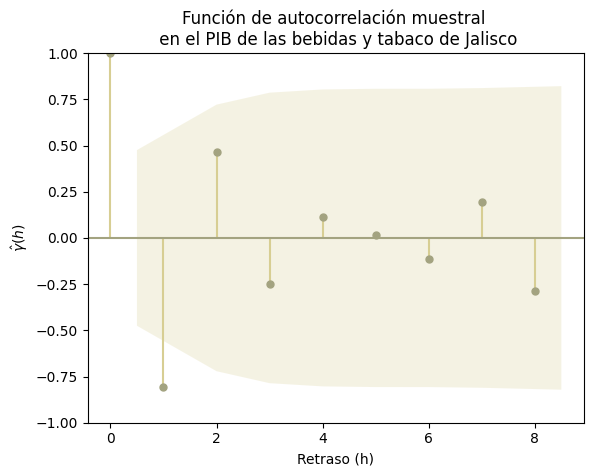

In [57]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(bebidas_4, vlines_kwargs = {"color": "#d7ce93"}, color = "#a3a380", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\gamma}(h)$")
plt.title("Función de autocorrelación muestral \n en el PIB de las bebidas y tabaco de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#d7ce93")
plt.savefig("prueba acf bebidas.png")
plt.show();

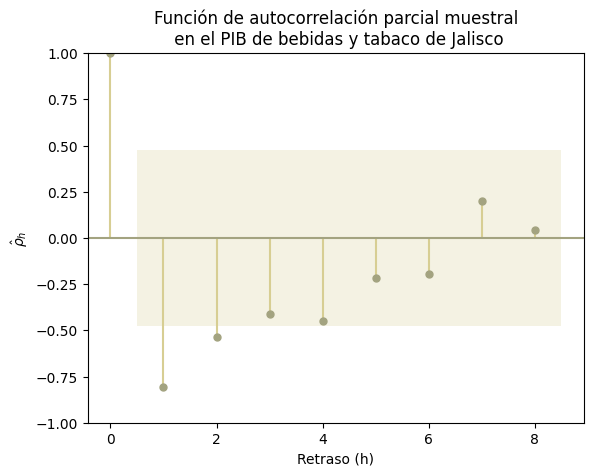

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(bebidas_4, vlines_kwargs = {"color": "#d7ce93"}, color = "#a3a380", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\rho}_{h}$")
plt.title("Función de autocorrelación parcial muestral\n en el PIB de bebidas y tabaco de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#d7ce93")
plt.savefig("prueba pacf bebidas.png")
plt.show();

Para este caso, notamos que existe autocorrelación en la función de autocorrelación, pero los coeficientes no se vuelven abruptamente no significativos, esto mismo lo vemos con la función de autocorrelación muestral. con lo cual, podemos inferir que este modelo es un proceso ARMA(p,q), sin embargo, considerando que tuvimos que diferenciar cuatro veces, lo más ideal sería aplicar un proceso más general como un ARIMA(p,4,q)

In [59]:
# preparamos los datos para evaluar los modelos y generar pronostricos a futuro (tres años)
train_bebidas = df_bebidas_tabaco[:-3]
test_bebidas = df_bebidas_tabaco[-3:]

In [60]:
print(train_bebidas.index)
print(train_bebidas.index.freq)

DatetimeIndex(['2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Año', freq='YS-JAN')
<YearBegin: month=1>


In [61]:
print(test_bebidas.index)
print(test_bebidas.index.freq)

DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', name='Año', freq='YS-JAN')
<YearBegin: month=1>


In [62]:
def optimize_arima(data, p, d, q):
    '''Ajusta un modelo ARIMA(p, d, q) de forma iterativa a un conjunto de datos y devuelve el AIC de cada modelo.

    Parámetros
    ----------
    data: pd.DataFrame
             Serie de tiempo.
    p: int
             Orden del proceso AR en el modelo ARIMA.
    d: int
             Orden de la diferencia aplicada para asegurar estacionariedad.
    q: int
             Orden del proceso MA en el modelo ARIMA.
    
    Output
    ------
    results: pd.DataFrame
              Data frame con los valores de p, d, q y el AIC asociado
    '''

    ## Generamos una partición (mesh)
    ## de los valores p y q, la reorganizamos
    ## en forma matricial para que sea
    ## más sencillo utilizar los valores
    x, y = np.meshgrid(p, q)
    orders = np.c_[x.ravel(), y.ravel()]

    ## Generamos una lista vacía para guardar
    ## los resultados del AIC de los modelos
    results = []

    ## Corremos un ciclo for para probar
    ## todas las combinaciones de parámetros
    for i in range(len(orders)):
        order_tuple = (orders[i,0], d, orders[i,1])
        model = SARIMAX(data, order = order_tuple).fit(maxiter = 1000)
        aic = model.aic
        results.append((order_tuple, aic))

    ## Convertimos los resultados a data frame
    ## y los ordenamos de acuerdo a su AIC
    results = pd.DataFrame(results, columns = ["Order", "AIC"]).sort_values(by = "AIC")

    return results

In [63]:
import warnings
warnings.filterwarnings("ignore")
p = np.arange(0, 3)
d = 4
q = np.arange(0, 3)

res = optimize_arima(train_bebidas["bebidas_tabaco"], p, d, q)
res

,Order,AIC
4,"(1, 4, 1)",280.047103
5,"(2, 4, 1)",281.703217
7,"(1, 4, 2)",281.970448
8,"(2, 4, 2)",282.041679
2,"(2, 4, 0)",282.763570
6,"(0, 4, 2)",282.926245
3,"(0, 4, 1)",287.337620
1,"(1, 4, 0)",288.409115
0,"(0, 4, 0)",297.311758


Según los resultados del AIC, el mejor modelo para nuestros datos es un ARIMA(1,4,1)

In [64]:
# aplicamos el modelo SARIMAX con los parámetros óptimos encontrados
modelo_bebidas = SARIMAX(train_bebidas, order = (1, 4, 1)).fit(maxiter = 1000)
modelo_bebidas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         bebidas_tabaco   No. Observations:                   18
Model:               SARIMAX(1, 4, 1)   Log Likelihood                -137.024
Date:                Mon, 09 Jun 2025   AIC                            280.047
Time:                        00:12:30   BIC                            281.964
Sample:                    01-01-2003   HQIC                           279.870
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.398     -2.513      0.012      -1.780      -0.220
ma.L1         -0.9994      0.379     -2.639      0.008      -1.742      -0.257
sigma2       1.65e+07    2.3e-08   7.18e+14      0.000    1.65e+07    1.65e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.97
Prob(Q):                              0.73   Prob(JB):                         0.14
Heteroskedasticity (H):               3.28   Skew:                            -1.15
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.06e+30. Standard errors may be unstable.
"""

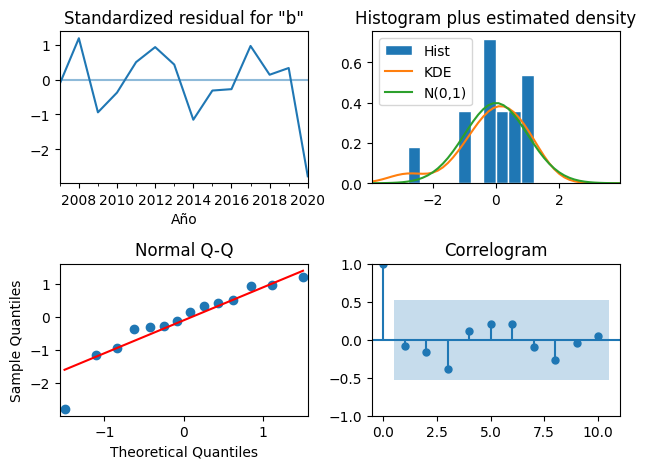

In [65]:
# graficamos los diagnósticos sobre los residuos del modelo
modelo_bebidas.plot_diagnostics();
plt.tight_layout()
plt.savefig("diagnosticos modelo bebidas.png")

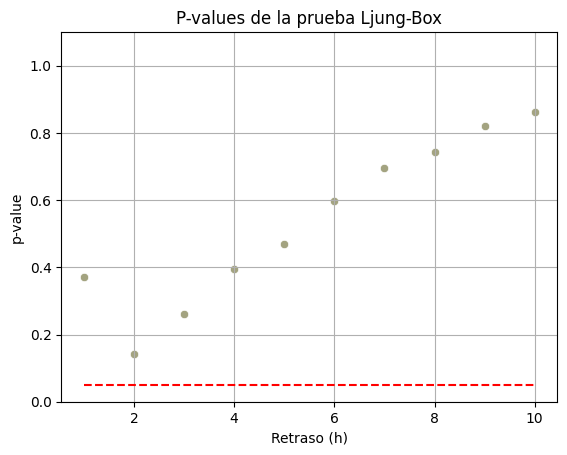

In [66]:
residuos_bebidas = modelo_bebidas.resid
ljbox = acorr_ljungbox(residuos_bebidas, lags = 10)

sns.scatterplot(x = np.arange(1, 11, 1), y = ljbox["lb_pvalue"], color = "#a3a380")
plt.hlines(y = 0.05, xmin = 1, xmax = 10, color = "red", linestyles = "--")
plt.grid()
plt.ylim(0, 1.1)
plt.xlabel("Retraso (h)")
plt.ylabel("p-value")
plt.title("P-values de la prueba Ljung-Box")
plt.savefig("prueba Ljung-Box modelo bebidas.png")
plt.show();

¿los residuos pueden ser considerados como ruido blanco?

- **Lineplot**: no se observa una tendencia clara ni patrones cíclicos, entonces parece aleatorio $\rightarrow$ varianza constante
- **Histograma**: + KDE: La forma del histograma es más o menos simétrica y la curva del KDE se acerca a la normal estandar $\rightarrow$ distribución aprox. normal
- **QQ-Plot**: los puntos siguen la línea recta, por lo cual sigue una distribucion normal
- **Correlograma**: Todas las autocorrelaciones caen dentro del intervalo de confianza 
- **Prueba de Ljung-Box**: tenemos p-values grandes, con lo cual comprobamos que no existe autocorrelación 


Entonces, dado todos los casos anteriores, **nuestros residuos del modelo se consideran ruido blanco** y el modelo está listo para realizar pronósticos

In [67]:
forecast_bebidas = modelo_bebidas.forecast(steps = 3)
forecast_bebidas

2021-01-01    36681.231999
2022-01-01    20322.677542
2023-01-01     6136.763085
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [68]:
test_bebidas

Descriptores,bebidas_tabaco
Año,
2021-01-01,44916.471
2022-01-01,47554.771
2023-01-01,45782.605


In [69]:
mape_arima_bebidas = np.mean(np.abs((test_bebidas["bebidas_tabaco"] - forecast_bebidas) / test_bebidas["bebidas_tabaco"]))* 100
print(f"MAPE del modelo ARIMA(1, 4, 1): {mape_arima_bebidas:.2f}%")

MAPE del modelo ARIMA(1, 4, 1): 54.07%


In [70]:
# generamos el pronóstico
forecaste_arima_bebidas_futuro = modelo_bebidas.get_forecast(steps = 3)

# Extraer valores puntuales del pronóstico y su intervalo de confianza
forecast_mean_bebidas = forecaste_arima_bebidas_futuro.predicted_mean
conf_int_beb = forecaste_arima_bebidas_futuro.conf_int()

# creamos el índice de años
last_year = df_bebidas_tabaco.index[-1]
future_dates = pd.date_range(start=last_year + pd.DateOffset(years=1), 
                               periods=3, freq='AS-JAN')

# ponemos el índice correcto en el forecast
forecast_mean_bebidas.index = future_dates
conf_int_beb.index = future_dates

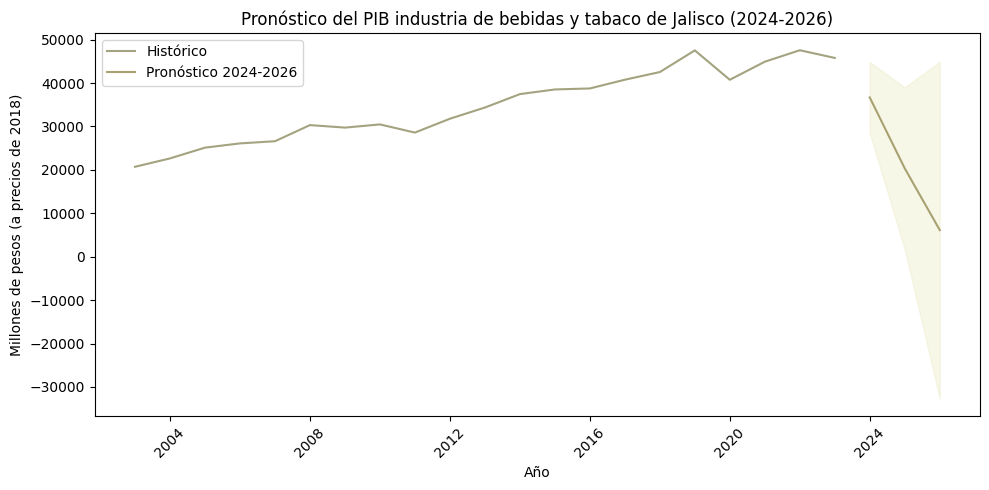

In [71]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_bebidas_tabaco, x=df_bebidas_tabaco.index, y='bebidas_tabaco', label='Histórico', color="#a3a380")
sns.lineplot(x=forecast_mean_bebidas.index, y=forecast_mean_bebidas, label='Pronóstico 2024-2026', color="#a8a171")
plt.fill_between(forecast_mean_bebidas.index, conf_int_beb.iloc[:, 0], conf_int_beb.iloc[:, 1], color='#e5e5b6', alpha=0.3)

plt.title('Pronóstico del PIB industria de bebidas y tabaco de Jalisco (2024-2026)')
plt.xlabel('Año')
plt.ylabel('Millones de pesos (a precios de 2018)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("pronosticos bebidas.png")
plt.show()

### Industria Manufacturera de Maquinaria 

In [72]:
df_maquinaria = df_mm[["Año", "maquinaria"]]
df_maquinaria

Descriptores,Año,maquinaria
0,2003-01-01,89707.795
1,2004-01-01,76505.138
2,2005-01-01,80337.049
3,2006-01-01,92392.023
4,2007-01-01,93513.649
5,2008-01-01,80141.018
6,2009-01-01,76156.633
7,2010-01-01,83749.991
8,2011-01-01,79037.002
9,2012-01-01,88189.125


In [73]:
df_maquinaria.set_index("Año", inplace=True)
df_maquinaria.index.freq = "AS-JAN"

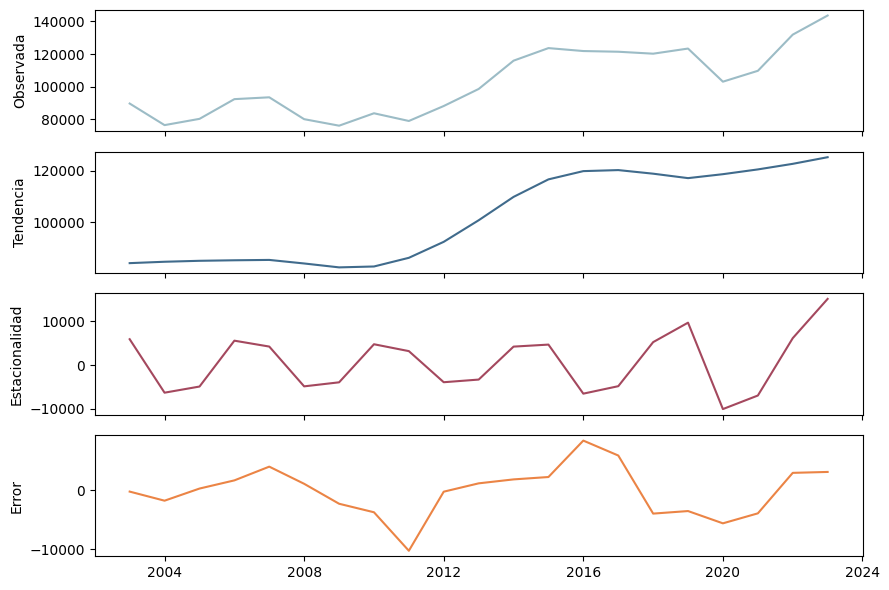

In [74]:
from statsmodels.tsa.seasonal import STL

decomposition_cientificos = STL(df_maquinaria['maquinaria'], period = 4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, sharex = True)
fig.set_figwidth(9)
fig.set_figheight(6)
ax1.plot(decomposition_cientificos.observed, color = "#9CBCC6")
ax1.set_ylabel("Observada")
ax2.plot(decomposition_cientificos.trend, color = "#406B8C")
ax2.set_ylabel("Tendencia")
ax3.plot(decomposition_cientificos.seasonal, color = "#A4485E")
ax3.set_ylabel("Estacionalidad")
ax4.plot(decomposition_cientificos.resid, color = "#EB8445")
ax4.set_ylabel("Error")
plt.tight_layout()
plt.show();

* aplicamos la prueba ADF para analizar estacionalidad 

In [75]:
test_estacionalidad_maquinaria = adfuller(df_mm["maquinaria"].copy().astype(float).dropna())
print(f"Estadístico de prueba: {test_estacionalidad_maquinaria[0]}")
print(f"Valor p: {test_estacionalidad_maquinaria[1]}")

Estadístico de prueba: 0.4266248893338353
Valor p: 0.9824637713364981


okay, obtuvimos un p-value muy alto, entonces tenemos que diferenciar!

In [76]:
maquinaria_1 = np.diff(df_mm["maquinaria"].copy(), n = 1)

In [77]:
test_estacionalidad_maquinaria_1 = adfuller(maquinaria_1)

print(f"Estadístico de prueba: {test_estacionalidad_maquinaria_1[0]}")
print(f"Valor p: {test_estacionalidad_maquinaria_1[1]}")

Estadístico de prueba: -6.144918539202102
Valor p: 7.809106388843445e-08


perfecto, entonces aplicamos procesos de orden 1

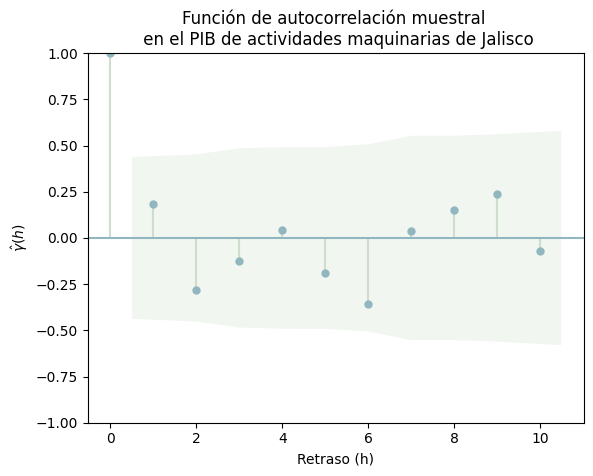

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(maquinaria_1, vlines_kwargs = {"color": "#cddecb"}, color = "#90b7bf", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\gamma}(h)$")
plt.title("Función de autocorrelación muestral \n en el PIB de actividades maquinarias de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#cddecb")
plt.savefig("prueba acf maquinarias.png")
plt.show();

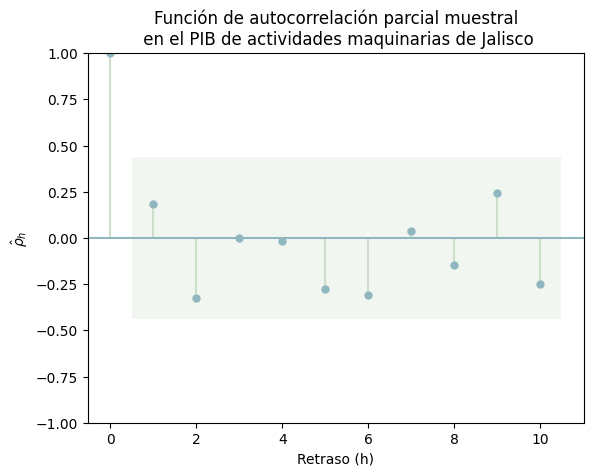

In [79]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()
plot_pacf(maquinaria_1, vlines_kwargs = {"color": "#cddecb"}, color = "#90b7bf", ax = ax);
plt.xlabel("Retraso (h)")
plt.ylabel(r"$\hat{\rho}_{h}$")
plt.title("Función de autocorrelación parcial muestral\n en el PIB de actividades maquinarias de Jalisco")

for poly in ax.collections:
    poly.set_facecolor("#cddecb")
plt.savefig("prueba pacf maquinaria.png")
plt.show();

Tristemente, el sector de la industria maquinaria sigue un proceso de caminata aleatoria, ya que todas las autocorrelaciones en ambas gráficas caen dentro de los intervalos de confianza